# Experimental Desigin

## Non-random assignment of subjects
An agricultural firm is conducting an experiment to measure how feeding sheep different types of grass affects their weight. They have asked for your help to properly set up the experiment. One of their managers has said you can perform the subject assignment by taking the top 250 rows from the DataFrame and that should be fine.

Your task is to use your analytical skills to demonstrate why this might not be a good idea. Assign the subjects to two groups using non-random assignment (the first 250 rows) and observe the differences in descriptive statistics.

You have received the DataFrame, weights which has a column containing the weight of the sheep and a unique id column.


* Use DataFrame slicing to put the first 250 rows of weights into group1_non_rand and the remaining into group2_non_rand.
* Generate descriptive statistics of the two groups and concatenate them into a single DataFrame.
* Print out to observe the differences.

In [6]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset of 1000 sheep weights
# Sheep weights typically range from 45-160 kg, with most around 80-120 kg
weights_data = {
    'id': range(1, 1001),
    'weight': np.concatenate([
        np.random.normal(55, 10, 500),   # Lighter sheep (first 500)
        np.random.normal(85, 15, 500)   # Heavier sheep (last 500)
    ])
}

# Create DataFrame
weights = pd.DataFrame(weights_data)

weights


,id,weight
0,1,59.967142
1,2,53.617357
2,3,61.476885
3,4,70.230299
4,5,52.658466
...,...,...
995,996,80.783496
996,997,111.965298
997,998,94.612643
998,999,76.432315


In [7]:
# Non-random assignment
group1_non_rand = weights.iloc[0:250, :]
group2_non_rand = weights.iloc[250:, :]

# Compare descriptive statistics of groups
compare_df_non_rand = pd.concat([group1_non_rand['weight'].describe(), group2_non_rand['weight'].describe()], axis=1)
compare_df_non_rand.columns = ['group1', 'group2']

# Print to assess
print(compare_df_non_rand)

           group1      group2
count  250.000000  750.000000
mean    54.975771   75.371924
std      9.660537   19.519375
min     28.802549   22.587327
25%     48.207510   59.964186
50%     55.592195   76.356931
75%     60.828654   89.823253
max     93.527315  124.485731


**Those two datasets have a much greater difference in means. It may be that the dataset was sorted before you received it. Presenting these results to the firm will help them understand best-practice group assignment. Hopefully you can now work with them to set up the experiment properly.**

## Random assignment of subjects
Having built trust from your last work with the agricultural firm, you have been given the task of properly setting up the experiment.

Use your knowledge of best practice experimental design set up to assign the sheep to two even groups of 250 each.


* Randomly select 250 subjects from the weights DataFrame into a new DataFrame group1 without replacement.
* Put the remaining 250 subjects into group2.
* Concatenate the descriptive statistics of your two newly created DataFrames.

In [8]:
# Randomly assign half
group1_random = weights.sample(frac=0.5, random_state=42, replace=False)

# Create second assignment
group2_random = weights.drop(group1_random.index)

# Compare assignments
compare_df_random = pd.concat([group1_random['weight'].describe(), group2_random['weight'].describe()], axis=1)
compare_df_random.columns = ['group1', 'group2']
print(compare_df_random)

           group1      group2
count  500.000000  500.000000
mean    69.017588   71.528184
std     18.853889   20.399682
min     28.802549   22.587327
25%     54.154161   55.316986
50%     65.617416   69.462084
75%     84.338825   87.588615
max    119.483472  124.485731


**While there are some differences in these datasets, you can clearly see the mean of the two sets are very close. This best-practice setup will ensure the experiment is on the right path from the beginning. Let's continue building foundational experimental design skills by learning about experimental design setup.**

# Blocking experimental data
You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a productivity_subjects DataFrame. Split the provided dataset into two even groups of 50 entries each.


* Randomly select 50 subjects from the productivity_subjects DataFrame into a new DataFrame block_1 without replacement.
* Set a new column, block to 1 for the block_1 DataFrame.
* Assign the remaining subjects to a DataFrame called block_2 and set the block column to 2 for this DataFrame.
* Concatenate the blocks together into a single DataFrame, and print the count of each value in the block column to confirm the blocking worked.

In [9]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset of 100 worker productivity measurements
# Productivity scores typically range from 50-150, with most around 80-120
productivity_data = {
    'worker_id': range(1, 101),
    'productivity': np.random.normal(100, 20, 100),
    'experience_years': np.random.randint(1, 20, 100),
    'department': np.random.choice(['Production', 'Assembly', 'Quality', 'Packaging'], 100)
}

# Create DataFrame
productivity_subjects = pd.DataFrame(productivity_data)

print("First 10 rows of the productivity dataset:")
print(productivity_subjects.head(10))
print(f"\nDataset shape: {productivity_subjects.shape}")
print("\n" + "="*60)


First 10 rows of the productivity dataset:
   worker_id  productivity  experience_years  department
0          1    109.934283                 9     Quality
1          2     97.234714                 5     Quality
2          3    112.953771                 1  Production
3          4    130.460597                19   Packaging
4          5     95.316933                10  Production
5          6     95.317261                12   Packaging
6          7    131.584256                15   Packaging
7          8    115.348695                 9     Quality
8          9     90.610512                17     Quality
9         10    110.851201                17    Assembly

Dataset shape: (100, 4)



In [10]:
# Randomly assign half
block_1 = productivity_subjects.sample(frac=0.5, random_state=42, replace=False)

# Set the block column
block_1['block'] = 1

# Create second assignment and label
block_2 = productivity_subjects.drop(block_1.index)
block_2['block'] = 2

# Concatenate and print
productivity_combined = pd.concat([block_1, block_2], axis=0)
print(productivity_combined['block'].value_counts())

block
1    50
2    50
Name: count, dtype: int64


**You were able to succesfully block this data into two equal sized groups. This is important especially when the size of the data is small, as is the case with this data. Let's consider an example where they may be a confounding variable and use stratification to assist.**

# Stratifying an experiment
You are working with a government organization that wants to undertake an experiment around how some particular government policies impact the net wealth of individuals in a number of areas.

They have approached you to help set up the experimental design. They have warned you that there is likely to be a small group of users who already have high net wealth and are concerned that this group might overshadow any experimental outcome observed. You know just what to do!

Use your knowledge of experimental design to undertake block randomization, stratifying by the high_wealth column in the provided wealth_data DataFrame. There are 2000 rows in the DataFrame with 200 high net wealth subjects (high_wealth is 1).


* Create the first block which contains all the high_wealth subjects and set the Block column to 1.
* Create two groups from this block randomly assigning the high_wealth subjects to the Treatment (T) or control (C) group.
* Repeat for the second block (all the not high_wealth subjects), setting the Block column to 2, and perform the group assignment (randomly assigning to Treatment (T) or control (C) group).
* Concatenate the four groups created into wealth_data_stratified in order of creation (strata 1 group 1, strata 1 group 2, etc.)

In [11]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset of 2000 individuals with wealth data
# 200 high wealth subjects (high_wealth = 1), 1800 regular wealth (high_wealth = 0)

# Generate regular wealth subjects (1800)
regular_wealth = {
    'net_wealth': np.random.lognormal(mean=10.5, sigma=0.8, size=1800),
    'high_wealth': 0,
    'age': np.random.randint(25, 65, 1800),
    'income': np.random.lognormal(mean=10.8, sigma=0.6, size=1800)
}

# Generate high wealth subjects (200)
high_wealth = {
    'net_wealth': np.random.lognormal(mean=13.5, sigma=0.9, size=200),
    'high_wealth': 1,
    'age': np.random.randint(35, 75, 200),
    'income': np.random.lognormal(mean=12.5, sigma=0.7, size=200)
}

# Create DataFrames
df_regular = pd.DataFrame(regular_wealth)
df_high = pd.DataFrame(high_wealth)

# Combine and add unique IDs
wealth_data = pd.concat([df_regular, df_high], ignore_index=True)
wealth_data['id'] = range(1, 2001)

# Shuffle the dataset to mix high and regular wealth subjects
wealth_data = wealth_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display dataset information
print("Wealth Dataset Overview:")
print(f"Total subjects: {len(wealth_data)}")
print(f"High wealth subjects: {wealth_data['high_wealth'].sum()}")
print(f"Regular wealth subjects: {len(wealth_data) - wealth_data['high_wealth'].sum()}")

print("\nFirst 10 rows of the dataset:")
print(wealth_data.head(10))

print("\nDescriptive statistics by wealth category:")
print(wealth_data.groupby('high_wealth')['net_wealth'].describe())

print("\nWealth distribution:")
print(wealth_data['high_wealth'].value_counts())

Wealth Dataset Overview:
Total subjects: 2000
High wealth subjects: 200
Regular wealth subjects: 1800

First 10 rows of the dataset:
      net_wealth  high_wealth  age         income    id
0  351709.305191            1   46  211670.804574  1861
1   31953.889070            0   55   56573.594763   354
2  119680.492636            0   26   28689.952163  1334
3   37689.968049            0   34   17999.142557   906
4    6487.856810            0   25   34274.245424  1290
5   28194.247316            0   35   69901.983605  1274
6   44136.420003            0   44   58585.943273   939
7   27461.671920            0   64   69769.153740  1732
8  107472.687323            0   41   33584.775514    66
9   53594.477769            0   29   32588.098819  1324

Descriptive statistics by wealth category:
              count          mean           std           min            25%  \
high_wealth                                                                    
0            1800.0  5.178831e+04  4.951536e+04

In [12]:
# Create the first block
strata_1 = wealth_data[wealth_data['high_wealth'] == 1]
strata_1['Block'] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(100, replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'

# Create the second block and assign groups
strata_2 = wealth_data[wealth_data['high_wealth'] == 0]
strata_2['Block'] = 2

strata_2_g1 = strata_2.sample(900, replace=False)
strata_2_g1['T_C'] = 'T'
strata_2_g2 = strata_2.drop(strata_2_g1.index)
strata_2_g2['T_C'] = 'C'

# Concatenate the grouping work
wealth_data_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])
print(wealth_data_stratified.groupby(['Block','T_C', 'high_wealth']).size())

Block  T_C  high_wealth
1      C    1              100
       T    1              100
2      C    0              900
       T    0              900
dtype: int64


/tmp/ipykernel_36/3626130965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_1['Block'] = 1
/tmp/ipykernel_36/3626130965.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_2['Block'] = 2


**Excellent work! You were able to split your data into different blocks and then randomly assign to treatment and control. You can clearly see two blocks, where the first block has half the high_wealth subjects split into treatment and control. The same is seen in the second block for the other subjects. Let's continue exploring stratification in another experimental setup.**

# Normal data and normal data visualization

## Visual normality in an agricultural experiment
You have been contracted by an agricultural firm conducting an experiment on 50 chickens, divided into four groups, each fed a different diet. Weight measurements were taken every second day for 20 days.

You'll analyze chicken_data to assess normality, which will determine the suitability of parametric statistical tests, beginning with a visual examination of the data distribution. The necessary packages for analysis have been imported for you:



* Plot the distribution of the chickens' weight using the kernel density estimation (KDE) to visualize normality.
* Create a qq plot with a standard line of the chickens' weight to assess normality visually.
* Subset chicken_data for a 'Time' of 2, and plot the KDE of 'weight' from subset_data to check if data is normal across time.



In [13]:
import seaborn as sns
import pandas as pd
from statsmodels.graphics.gofplots import qqplot

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic chicken weight data
n_chickens = 50
n_time_points = 10  # Every 2 days for 20 days = 10 time points
diets = ['A', 'B', 'C', 'D']

# Create the dataset
data = []
chicken_id = 1

for diet in diets:
    # Each diet group has approximately 12-13 chickens
    n_in_diet = 13 if diet in ['A', 'B'] else 12
    
    # Different base weights and growth patterns for each diet
    if diet == 'A':
        base_weight = np.random.normal(800, 50, n_in_diet)
        growth_rate = np.random.normal(15, 3, n_in_diet)
    elif diet == 'B':
        base_weight = np.random.normal(850, 60, n_in_diet)
        growth_rate = np.random.normal(18, 4, n_in_diet)
    elif diet == 'C':
        base_weight = np.random.normal(780, 55, n_in_diet)
        growth_rate = np.random.normal(12, 2, n_in_diet)
    else:  # diet D
        base_weight = np.random.normal(820, 65, n_in_diet)
        growth_rate = np.random.normal(20, 5, n_in_diet)
    
    for i in range(n_in_diet):
        for day in range(0, 21, 2):  # Every 2 days for 20 days
            # Add some random noise to the growth pattern
            noise = np.random.normal(0, 10)
            weight = base_weight[i] + (growth_rate[i] * day / 2) + noise
            data.append({
                'Chicken_ID': chicken_id,
                'Diet': diet,
                'Time': day,
                'weight': max(weight, 500)  # Ensure weight doesn't go negative
            })
        chicken_id += 1

# Create DataFrame
chicken_data = pd.DataFrame(data)

# Display dataset information
print("Chicken Weight Dataset Overview:")
print(f"Total observations: {len(chicken_data)}")
print(f"Number of chickens: {chicken_data['Chicken_ID'].nunique()}")
print(f"Number of time points: {chicken_data['Time'].nunique()}")
print(f"Diet distribution:")
print(chicken_data.groupby('Diet')['Chicken_ID'].nunique())

print("\nFirst 10 rows of the dataset:")
print(chicken_data.head(10))

print("\nSummary statistics by diet:")
print(chicken_data.groupby('Diet')['weight'].describe())

# Save to CSV for later use
chicken_data.to_csv('chicken_weight_data.csv', index=False)
print("\nDataset saved as 'chicken_weight_data.csv'")

Chicken Weight Dataset Overview:
Total observations: 550
Number of chickens: 50
Number of time points: 11
Diet distribution:
Diet
A    13
B    13
C    12
D    12
Name: Chicken_ID, dtype: int64

First 10 rows of the dataset:
   Chicken_ID Diet  Time      weight
0           1    A     0  813.325772
1           1    A     2  837.852847
2           1    A     4  837.349639
3           1    A     6  849.699248
4           1    A     8  855.859279
5           1    A    10  889.659286
6           1    A    12  880.261691
7           1    A    14  879.079713
8           1    A    16  907.142431
9           1    A    18  895.968705

Summary statistics by diet:
      count        mean        std         min         25%         50%  \
Diet                                                                     
A     143.0  880.425908  57.815084  763.508946  834.961032  878.867757   
B     143.0  948.956600  83.046534  798.683197  892.737233  942.652274   
C     132.0  819.420770  53.189702  699.7285

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


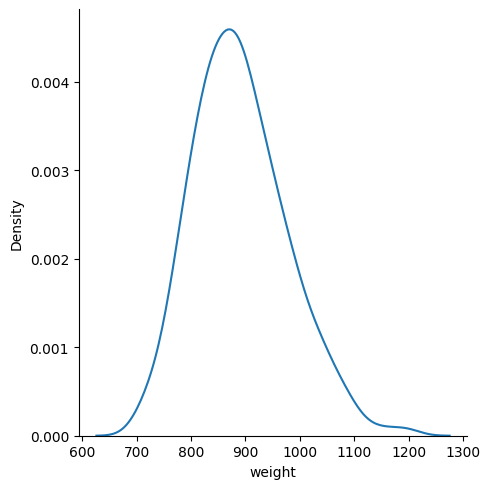

In [15]:
# Plot the distribution of the chickens' weight
sns.displot(data=chicken_data, x='weight', kind="kde")
plt.show()

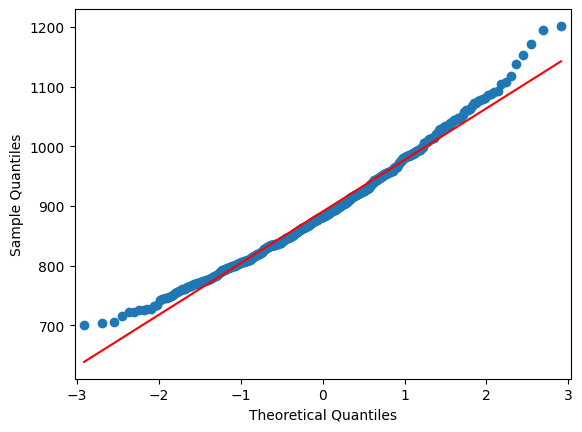

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Plot the qq plot of the chickens' weight
qqplot(data=chicken_data['weight'], line='s')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


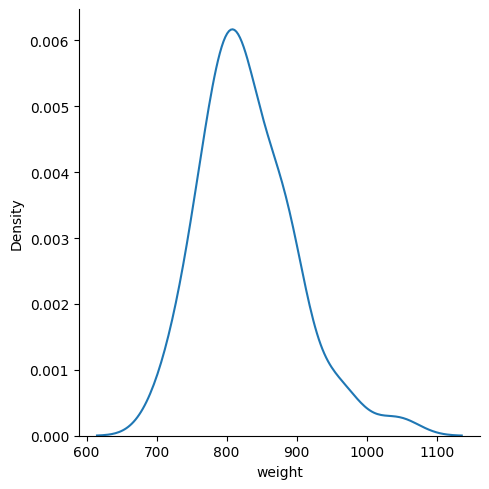

In [18]:
# Subset the data and plot the weight of the subset
subset_data = chicken_data[chicken_data['Time'] == 2]

sns.displot(data=subset_data, x='weight', kind="kde")
plt.show()

**Great stuff! Your first distribution plot looked a bit normal, but the qq plot was not aligned, and tapered off at the top and bottom. This indicates the data may have tails that affect normality. It also looked a bit more normal at the second time point. Let's confirm some of our thoughts using analytical methods.**

In [19]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import anderson

## Analytical normality in an agricultural experiment
Carrying on from your previous work, your visual inspections of the data indicate it may not be a normal dataset overall, but that the initial time point may be.

Build on your previous work by using analytical methods to determine the normality of the dataset.

The DataFrame chicken_data has been read in for you, and the following package imports have been run already:


* Run a Shapiro-Wilk test of normality on the 'weight' column and print the test statistic and p-value.

In [20]:
# Run a Shapiro-Wilk normality test on the weight column
test_statistic, p_value = shapiro(chicken_data['weight'])

print(f"p: {round(p_value, 4)} test stat: {round(test_statistic, 4)}")

p: 0.0 test stat: 0.9833


**At a significance level of 0.05, does the Shapiro-Wilk test indicate the data is normally distributed?**

No, the data is NOT normally distributed.

Here's why in simple terms:

The p-value is 0.0, which means it's extremely small (smaller than 0.0001)

In statistical tests, we compare the p-value to our significance level (0.05)

If p-value < 0.05: The data is NOT normal

If p-value ≥ 0.05: The data is normal

Since 0.0 is much smaller than 0.05, the test strongly indicates that the chicken weight data does not follow a normal distribution.

Think of it like this: The test is saying there's essentially zero chance that this data came from a perfectly normal bell-shaped distribution.

In [21]:
# Run the Anderson-Darling test
result = anderson(x=chicken_data['weight'], dist='norm')

print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 2.0304
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.572 0.651 0.781 0.911 1.084]


**Given the returned Anderson-Darling test result, what could you conclude at the 5% significance level?**

answer:  The data does not come from a Normal distribution.

No, the data is NOT normally distributed at the 5% significance level.

Here's why in simple terms:

Your test statistic is 2.0304

The critical value at 5% is 0.781

The rule is: If your test statistic is greater than the critical value, the data is NOT normal.

Since 2.0304 is much larger than 0.781, the test clearly shows that the chicken weight data does not follow a normal distribution.